In [14]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the default Seaborn theme
sns.set_theme()

In [2]:
# loading the data set
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,[3,4]].values

C:\Users\SAi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss_list')

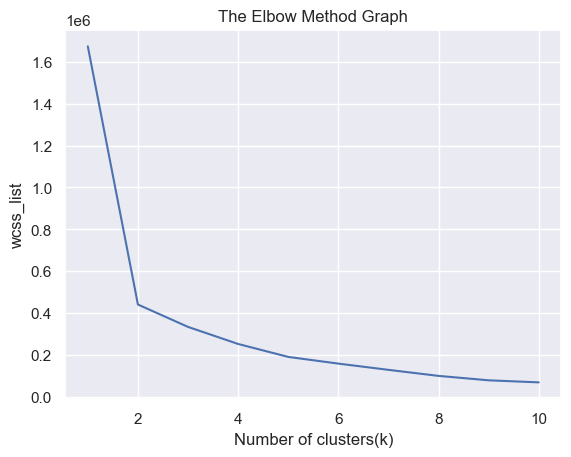

In [15]:
# finding optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss_list = [] # initializing the list for the values of wcss
#using for loop for iterations from 1 to 10.
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")

In [8]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 42)
y_predict = kmeans.fit_predict(x)

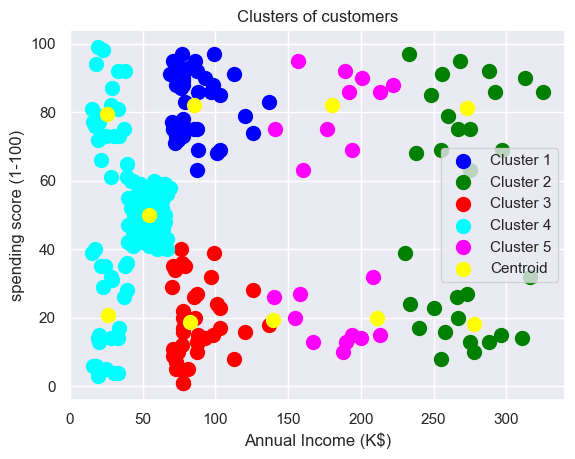

In [16]:
#visualizing the clusters
plt.scatter(x[y_predict == 0,0 ], x[y_predict == 0,1], s = 100, c= 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1,0 ], x[y_predict == 1,1], s = 100, c= 'green', label = 'Cluster 2')
plt.scatter(x[y_predict == 2,0 ], x[y_predict == 2,1], s = 100, c= 'red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3,0 ], x[y_predict == 3,1], s = 100, c= 'cyan', label = 'Cluster 4')
plt.scatter(x[y_predict == 4,0 ], x[y_predict == 4,1], s = 100, c= 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c= 'yellow', label = 'Centroid')
plt.title("Clusters of customers")
plt.xlabel("Annual Income (K$)")
plt.ylabel("spending score (1-100)")
plt.legend()
plt.show()